# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## 1) Текстовое описание набора данных

Для анализа был выбран dataset “Headphone specs”. Набор данных содержит информацию о наушниках и их характеристиках. 

Таблица имеет 551 запись. Каждая запись содержит информацию о:

• названии

• бренде

• модели 

• цвете

• форм-факторе

• типе сопряжения

• цене производства

• цене продажи

### Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.



In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. Исходный датасет имеет расширение .xlsx, поэтому будем использовать метод read_excel()

In [58]:
data = pd.read_excel('./data/dataset.xlsx')

### Проверка данных

Набор данных был проверен на наличие отсутствия данных по столбцам. При отсутствии данных кортеж исключается из выборки. Для этого был использован метод dropna() для объектов DataFrame

In [59]:
data.dropna()

,Title,Selling_Price,Production_Price,Brand,Model,Colour,Form_Factor,Connectivity_Type
2,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Moon Grey,In Ear,Bluetooth
3,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Moon Grey,In Ear,Bluetooth
4,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Stellar Black,In Ear,Bluetooth
5,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Stellar Black,In Ear,Bluetooth
6,"boAt Airdopes 100 with 50 Hours Playback, Quad...",4490.0,1399.0,boAt,"Airdopes 100 with 50 Hours Playback, Quad Mics...",Emerald Green,In Ear,Bluetooth
...,...,...,...,...,...,...,...,...
545,"ZEBRONICS ZEB-HARK Wired Headset (Black, In t...",349.0,270.0,ZEBRONICS,ZEB-HARK,Black,In Ear,Wired
546,"ZEBRONICS Zeb- Bro Plus Wired Headset (Black,...",349.0,298.0,ZEBRONICS,Zeb- Bro Plus,Black,In Ear,Wired
547,"ZEBRONICS Zeb- Bro Plus Wired Headset (Black,...",349.0,298.0,ZEBRONICS,Zeb- Bro Plus,Black,In Ear,Wired
548,"ZEBRONICS ZEB-BRO Wired Headset (Black, In th...",349.0,299.0,ZEBRONICS,ZEB-BRO,Black,In Ear,Wired


## Отчистка данных

При помощи метода drop_dublicates() была совершена попытка удалить записи с полностью совпадающим набором по столбцам: название, цена продажи, цена производства, бренд, модель, цвет, форм-фактор, тип сопряжения. Повторяющиеся записи были обнаружены, дубликаты были успешно удалены

In [60]:
data.drop_duplicates()

,Title,Selling_Price,Production_Price,Brand,Model,Colour,Form_Factor,Connectivity_Type
0,(Refurbished) Ptron Twinspro Bluetooth Headset...,NaN,NaN,(Refurbished),Twinspro,Black,In Ear,Bluetooth
2,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Moon Grey,In Ear,Bluetooth
4,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Stellar Black,In Ear,Bluetooth
6,"boAt Airdopes 100 with 50 Hours Playback, Quad...",4490.0,1399.0,boAt,"Airdopes 100 with 50 Hours Playback, Quad Mics...",Emerald Green,In Ear,Bluetooth
8,"boAt Airdopes 100 with 50 Hours Playback, Quad...",4490.0,1399.0,boAt,"Airdopes 100 with 50 Hours Playback, Quad Mics...",Sapphire Blue,In Ear,Bluetooth
...,...,...,...,...,...,...,...,...
540,"ZEBRONICS ZEB-BRO Wired Headset (Red, In the ...",399.0,325.0,ZEBRONICS,ZEB-BRO,Red,In Ear,Wired
542,"ZEBRONICS ZEB BRO+ Wired Headset (Black, In t...",349.0,267.0,ZEBRONICS,ZEB BRO+,Black,In Ear,Wired
544,"ZEBRONICS ZEB-HARK Wired Headset (Black, In t...",349.0,270.0,ZEBRONICS,ZEB-HARK,Black,In Ear,Wired
546,"ZEBRONICS Zeb- Bro Plus Wired Headset (Black,...",349.0,298.0,ZEBRONICS,Zeb- Bro Plus,Black,In Ear,Wired


## Обработка записей с ценой 0

На данном этапе удаляем все записи, в которых цена производства или цена продажи меньше или равна нулю

In [61]:
data = data[(data['Production_Price'] > 0) & (data['Selling_Price'] > 0)]

## 2) Основные характеристики датасета

In [62]:
# Первые 5 строк датасета
data.head()

,Title,Selling_Price,Production_Price,Brand,Model,Colour,Form_Factor,Connectivity_Type
2,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Moon Grey,In Ear,Bluetooth
3,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Moon Grey,In Ear,Bluetooth
4,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Stellar Black,In Ear,Bluetooth
5,"boAt Rockerz 333ANC with Crystal Bionic Sound,...",4990.0,1999.0,boAt,Rockerz 333ANC,Stellar Black,In Ear,Bluetooth
6,"boAt Airdopes 100 with 50 Hours Playback, Quad...",4490.0,1399.0,boAt,"Airdopes 100 with 50 Hours Playback, Quad Mics...",Emerald Green,In Ear,Bluetooth


In [63]:
# Размер датасета - 547 строк, 8 колонок
data.shape

(547, 8)

In [64]:
# Список колонок
data.columns

Index(['Title', 'Selling_Price', 'Production_Price', 'Brand', 'Model',
       'Colour', 'Form_Factor', 'Connectivity_Type'],
      dtype='object')

In [65]:
# Список колонок с типами данных
data.dtypes

Title                 object
Selling_Price        float64
Production_Price     float64
Brand                 object
Model                 object
Colour                object
Form_Factor           object
Connectivity_Type     object
dtype: object

In [66]:
# Основные статистические характеристки набора данных
data.describe()

,Selling_Price,Production_Price
count,547.000000,547.000000
mean,4244.365631,1724.126143
std,3864.963822,2004.139449
min,349.000000,255.000000
25%,2499.000000,999.000000
50%,3199.000000,1299.000000
75%,4599.000000,1599.000000
max,27999.000000,16299.000000


## 3) Визуальное исследование датасета

### Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости

<Axes: xlabel='Selling_Price', ylabel='Production_Price'>

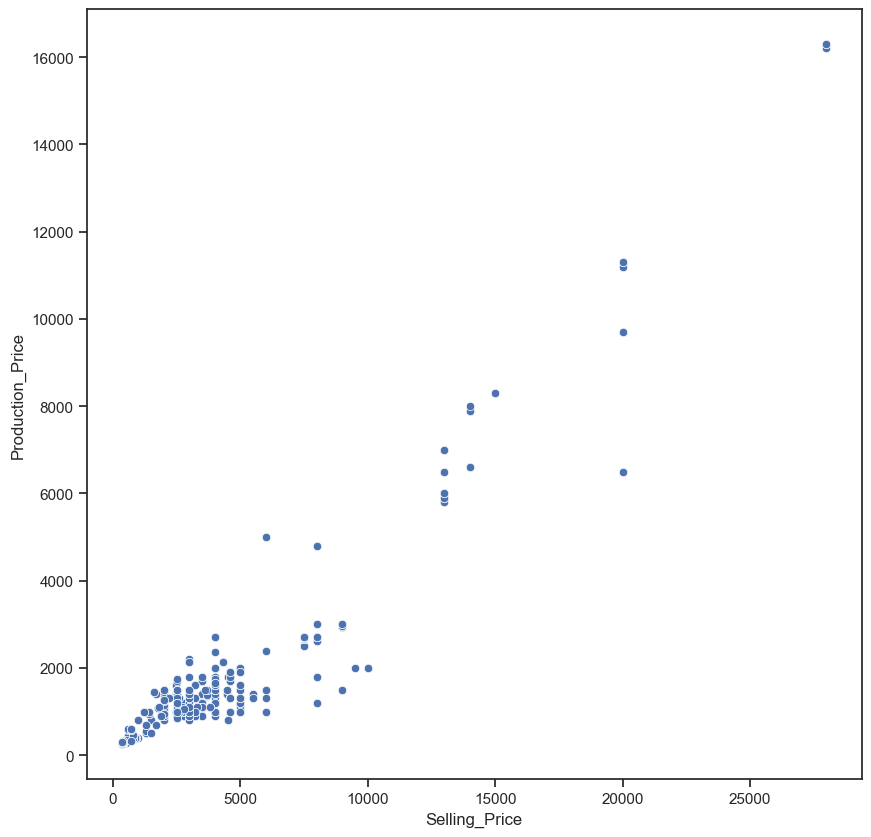

In [67]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Selling_Price', y='Production_Price', data=data)

### Гистограмма

Позволяет оценить плотность вероятности распределения данных

<Axes: xlabel='Selling_Price', ylabel='Count'>

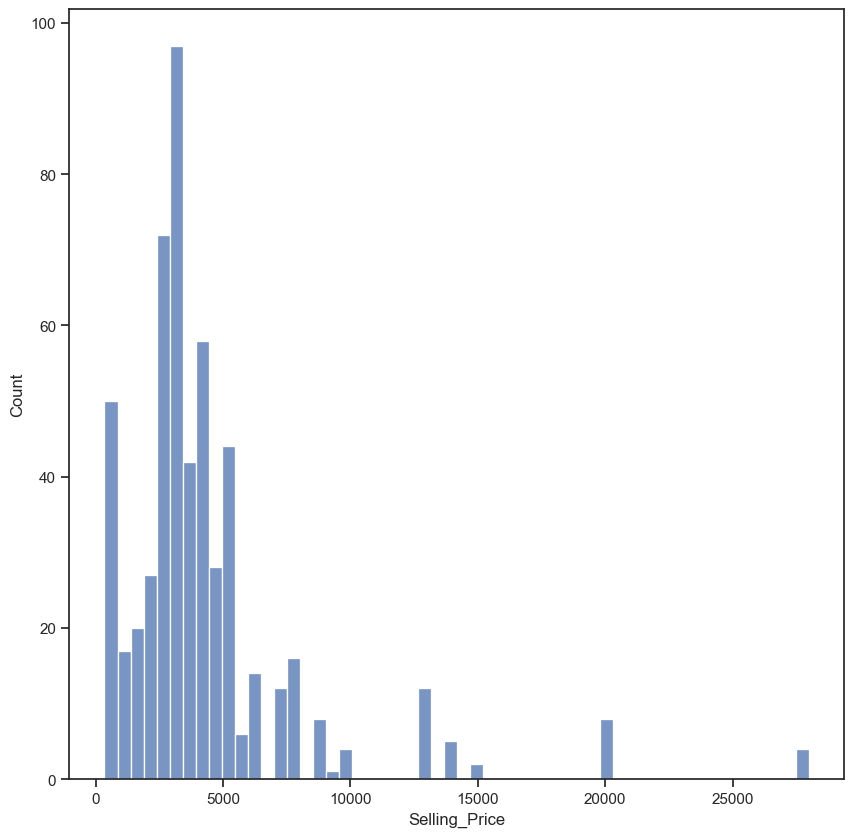

In [68]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['Selling_Price'])

### Joinplot

Комбинация гистограмм и диаграмм рассеивания

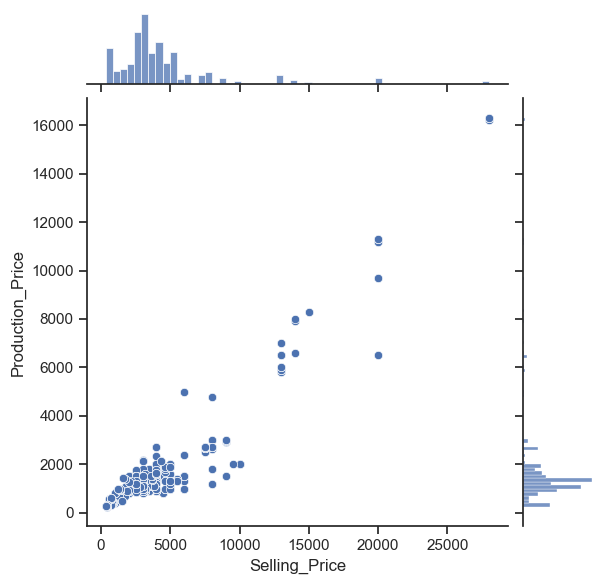

In [69]:
sns.jointplot(x='Selling_Price', y='Production_Price', data=data)

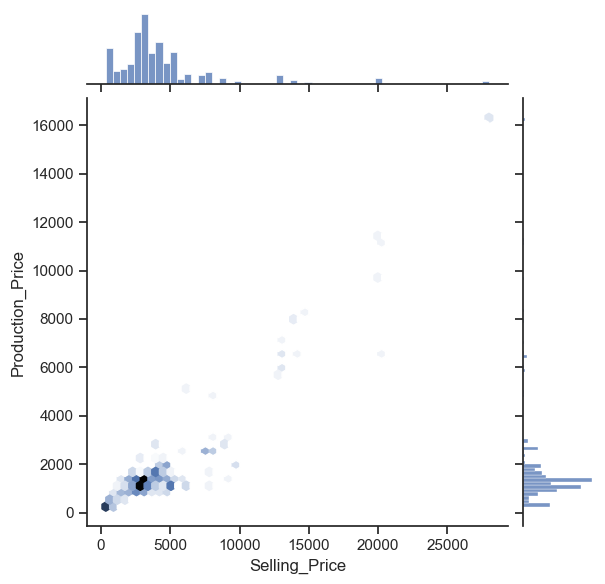

In [70]:
sns.jointplot(x='Selling_Price', y='Production_Price', data=data, kind='hex')

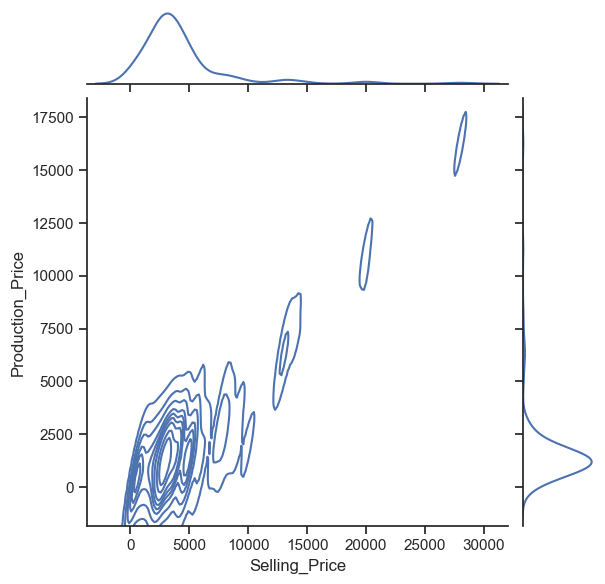

In [71]:
sns.jointplot(x='Selling_Price', y='Production_Price', data=data, kind='kde')

### Парные диаграммы

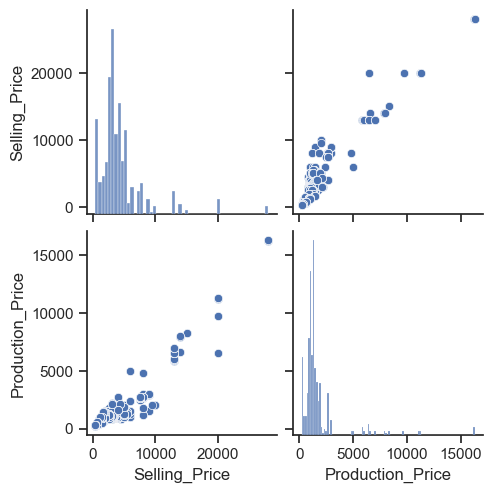

In [72]:
sns.pairplot(data)

### Ящик с усами

Отображает одномерное распределение вероятности

<Axes: xlabel='Selling_Price'>

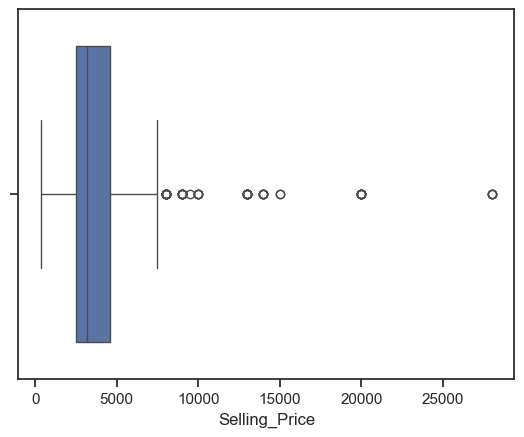

In [73]:
sns.boxplot(x=data['Selling_Price'])

### Violin plot

<Axes: xlabel='Selling_Price'>

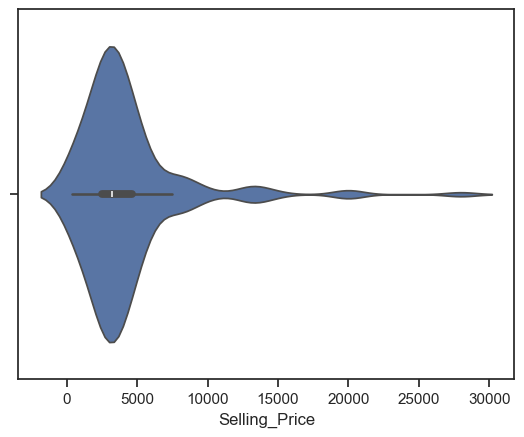

In [74]:
sns.violinplot(x=data['Selling_Price'])

## 4) Информация о корреляции признаков

In [75]:
data.corr(numeric_only=True)

,Selling_Price,Production_Price
Selling_Price,1.000000,0.928861
Production_Price,0.928861,1.000000


In [76]:
data.corr(numeric_only=True, method='pearson')

,Selling_Price,Production_Price
Selling_Price,1.000000,0.928861
Production_Price,0.928861,1.000000


In [77]:
data.corr(numeric_only=True, method='spearman')

,Selling_Price,Production_Price
Selling_Price,1.000000,0.706895
Production_Price,0.706895,1.000000


<Axes: >

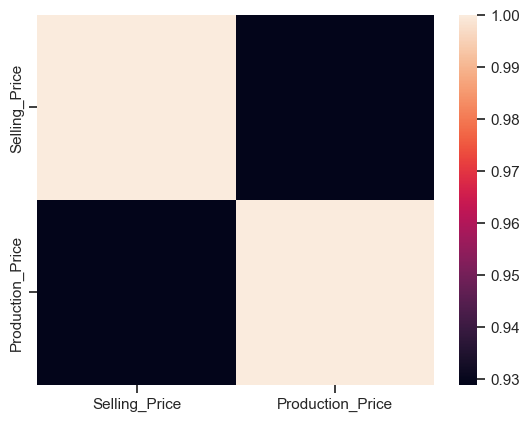

In [78]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: >

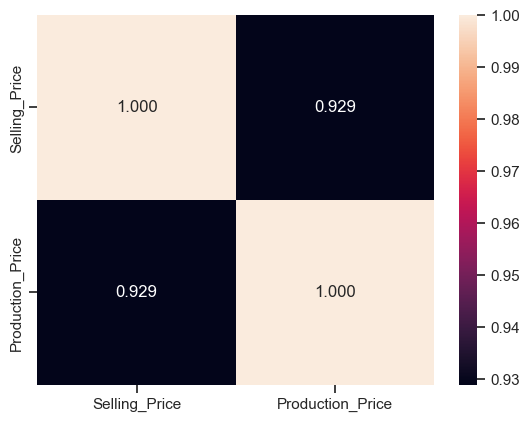

In [79]:
# Вывод значений в ячейках
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.3f')

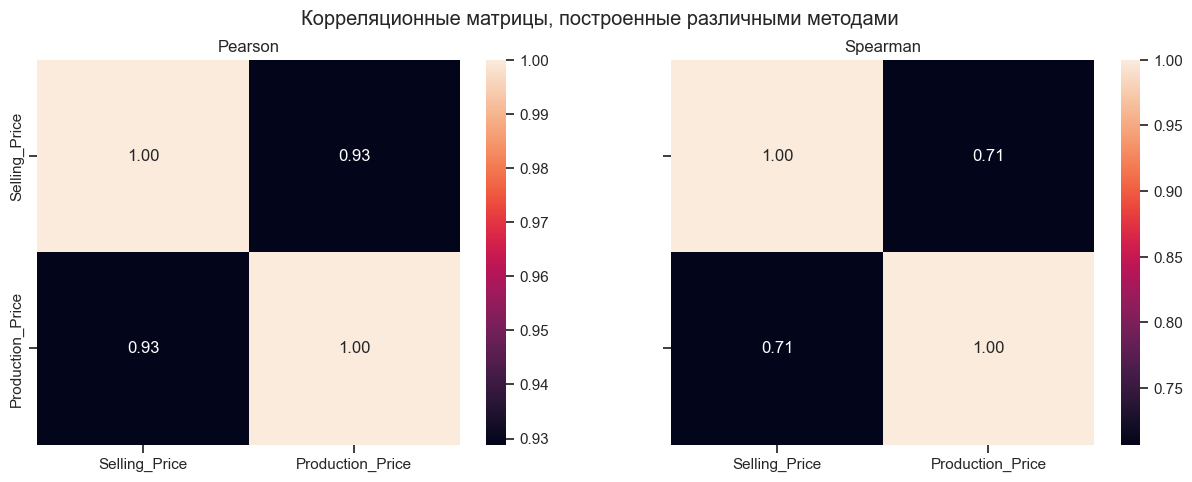

In [80]:

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True, method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(numeric_only=True, method='spearman'), ax=ax[1], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Spearman')

### Теловая карта с указанием размера

<Axes: >

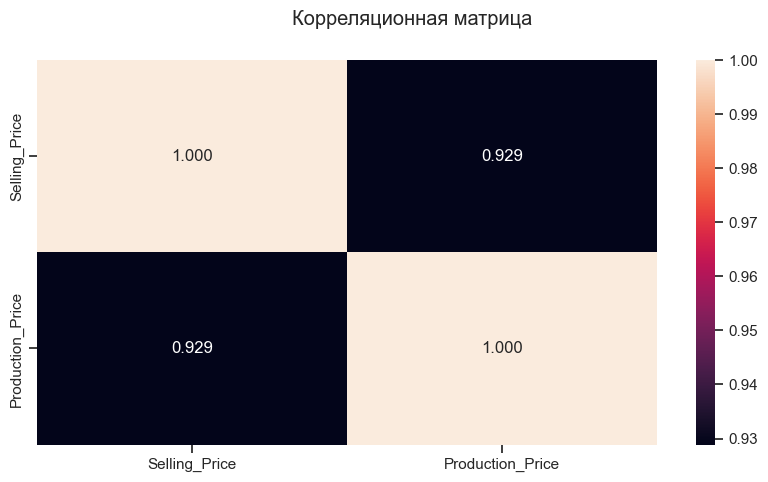

In [81]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(numeric_only=True), ax=ax, annot=True, fmt='.3f')

## 5) Кодирование категориальных признаков

### Кодирование категорий целочисленными значениями (label encoding)

#### Использование LabelEncoder

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()

data_le = le.fit_transform(np.unique(data['Brand']))
print(data_le)

[0 1 2 3 4 5 6 7]


In [84]:
le.inverse_transform(data_le)

array(['Boult', 'Noise', 'PTron', 'Portronics', 'Skullcandy', 'Wings',
       'ZEBRONICS', 'boAt'], dtype=object)

#### Использование OrdinalEncoder

In [85]:
from sklearn.preprocessing import OrdinalEncoder

todo

#### Кодирование категорий наборами бинарных значений - one-hot encoding

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
ohe = OneHotEncoder()
data_brand_ohe = ohe.fit_transform(data[['Brand']])

In [88]:
data[['Brand']].shape

(547, 1)

In [89]:
data_brand_ohe.shape

(547, 8)

In [90]:
data_brand_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])

In [91]:
data[['Brand']].head(100)

,Brand
2,boAt
3,boAt
4,boAt
5,boAt
6,boAt
...,...
97,Boult
98,Boult
99,Boult
100,Boult


#### Pandas get_dummies - быстрый вариант one-hot кодирования

In [92]:
pd.get_dummies(data[['Brand']]).head()

,Brand_Boult,Brand_Noise,Brand_PTron,Brand_Portronics,Brand_Skullcandy,Brand_Wings,Brand_ZEBRONICS,Brand_boAt
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,True


## 6) Масштабирование данных

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [94]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Selling_Price']])

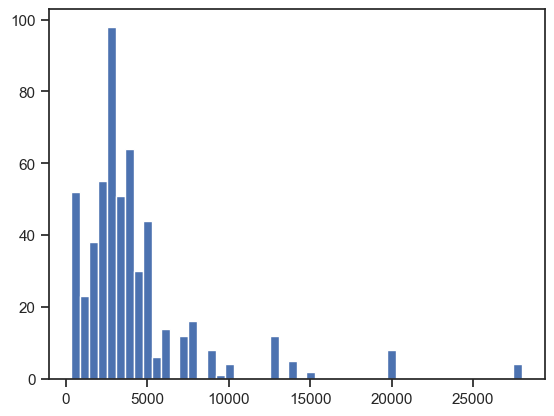

In [95]:
plt.hist(data['Selling_Price'], 50)
plt.show()

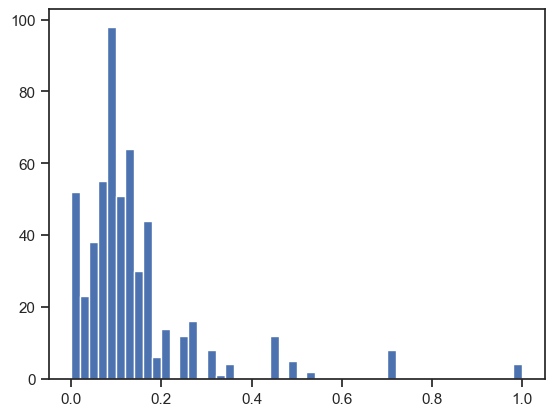

In [96]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [97]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Selling_Price']])

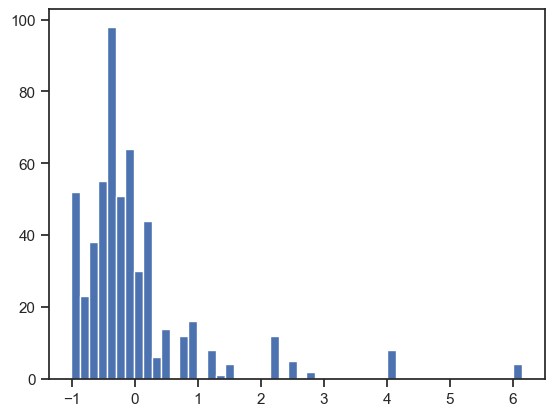

In [98]:
plt.hist(sc2_data, 50)
plt.show()